# Códigos para el Trabajo Grupal 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import struve
from scipy.special import j1

## Sacando diámetro

In [2]:
#L=largo=10 cm
#A=Ancho=4.5 cm
#Transformar en metros
L=10/100
A=4.5/100
#Calculando radio
a=np.sqrt(L*A/np.pi)
print("El radio es", round(a,4), "m")
D=2*a
print("El diámetro del parlante es", round(D,4), "m")
print("El diámetro del parlante es", round(D*1000,4), "mm")

El radio es 0.0378 m
El diámetro del parlante es 0.0757 m
El diámetro del parlante es 75.694 mm


## Sacando Sd

In [3]:
sd=(np.pi*a**2)
print("Sd es", round(sd, 7), "m")
print("Sd es", round(sd*1000, 4), "mm")

Sd es 0.0045 m
Sd es 4.5 mm


## Fórmulas
+ $Z_E=R_E+jwL_E+\frac{(BL)^2}{R_{MS}}(\frac{\frac{jw}{Q_{MS}w_s}}{1-\frac{w^2}{w_s^2}+\frac{jw}{Q_{MS}w_s}})$
+ $C_{MS}=\frac{V_{AS}}{Sd^2 \rho_o c_o^2}$
+ $M_{MS}=\frac{1}{w_s^2C_{MS}}$
+ $R_{MS}=\frac{1}{Q_{MS}}\sqrt{\frac{M_{MS}}{C_{MS}}}$
+ $BL=\sqrt{\frac{R_E}{w_sQ_{ES}C_{MS}}}$
+ $r_o=\frac{Z_{max}}{R_E}$
+ $Z'=R_E\sqrt{r_o}$
+ $Q_{MS}=\frac{f_s\sqrt{r_o}}{f_2-f_1}$
+ $Q_{TS}=\frac{Q_{ES}Q_{MS}}{Q_{ES}+Q_{MS}}$
+ $f_s=\frac{1}{2\pi \sqrt{M_{MS}C_{MS}}}$
+ $w_s=2\pi f_s=\frac{1}{\sqrt{M_{MS}C_{MS}}}$
+ $Z_{MT}=\frac{(BL)^2}{R_g+R_E+jwL_E}+jwM_{MD}+R_{MS}+\frac{1}{jwC_{MS}}+2Sd\rho_oc_o(1-\frac{j_1(2ka)}{ka}+j(\frac{H_1(2ka)}{ka}))$
+ $M_{MD}=M_{MS}-2M_{M1}$ donde $M_{M1}=2.67a^3\rho_o$
+ $ka=\frac{w}{c}a$
+ $j_1(2ka)=(\frac{2ka}{2})^v\sum_{m=0}^{\infty}\frac{(-1)^m}{m!(m+v)!}(\frac{2ka}{2})^{2m}$
+ $H_1(2ka)=(\frac{2ka}{2})^{v+1}\sum_{m=0}^{\infty}\frac{1}{\Gamma(m+\frac{3}{2})\Gamma(m+v+\frac{3}{2})}(\frac{2ka}{2})^{2m}$
+ $u_c(rms)=|{\frac{e_g(rms)BL}{(R_g+R_E+jwL_E)Z_{MT}}}|$
+ $e_g(rms)=|{\frac{e_g}{\sqrt{2}}}|$
+ $P_{rms}(r)=\frac{\rho_ofSdu_c(rms)}{r}$
+ $SPL=20\log{\frac{P_{rms}(r)}{P_{ref}}}$

## Datos medición Thiele-Small
+ $f_s= 246.2$ Hz
+ $R_E= 7.449$ ohms
+ $Q_{MS}= 4.459$
+ $Q_{ES}= 6.542$
+ $Q_{TS}= 2.652$
+ $V_{AS}=0.8698$ Litros
+ $L_E= 0.2016$ mH
+ $SPL=84.87$ 1W/1m
+ $M_{MS}= 1.366$ gr
+ $C_{MS}= 0.306$ mm/N
+ $BL= 1.551$

## Datos medición Free Air
+ $f_s= 246.2$ Hz

## Datos medición Método Masa
+ $M=10.824$ gr
+ $f_s= 118.3$ Hz

## Pregunta 1: Gráficos

In [4]:
XTICKS = np.array([5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000])
XTICK_LABELS = np.array(['5', '10', '20', '50', '100', '200', '500', '1k', '2k', '5k', '10k', '20k'])

In [5]:
Free_air=pd.read_csv('Gamboa_Arancibia\DATS_FreeAir.csv')

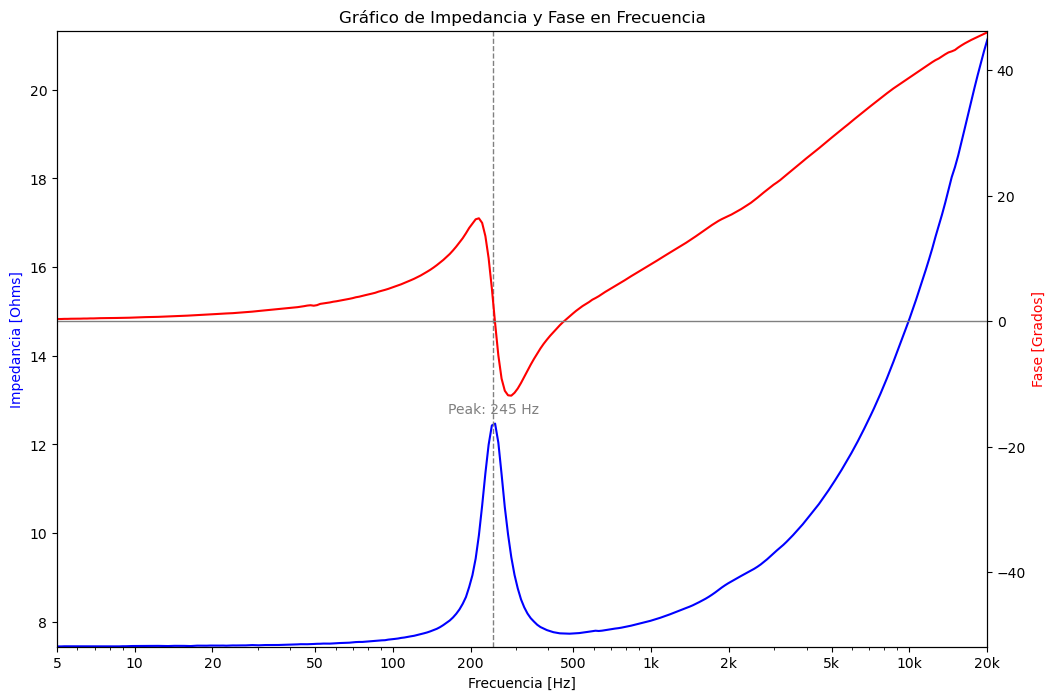

In [6]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Graficar la impedancia en el primer eje (ax1)
ax1.plot(Free_air['Freq'], Free_air['Impedance'], 'b-')
ax1.set_xlabel('Frecuencia [Hz]')
ax1.set_ylabel('Impedancia [Ohms]', color='b')

# Configurar el eje Y para que se ajuste a los valores de la impedancia
ax1.set_ylim(Free_air['Impedance'].min(), Free_air['Impedance'].max())

# Crear un segundo eje Y (ax2) para la fase
ax2 = ax1.twinx()
ax2.plot(Free_air['Freq'], Free_air['Phase'], 'r-')
ax2.set_ylabel('Fase [Grados]', color='r')

# Configurar el eje X en escala logarítmica
plt.xlim(5,20000)
plt.xscale('log')
plt.xticks(XTICKS,XTICK_LABELS)

# Desplazar verticalmente la gráfica de fase para que no se superponga con la impedancia
# Puedes ajustar los límites en ax2 para separarlo visualmente.
ax2.set_ylim(Free_air['Phase'].min() - 40, Free_air['Phase'].max() - 0)

# Agregar una línea punteada en el eje 0 de la fase
ax2.axhline(0, color='gray', linestyle='-', linewidth=1)

# Graficar la línea vertical en la frecuencia del valor máximo de la impedancia
ax1.axvline(245, color='gray', linestyle='--', linewidth=1)

ax1.text(245,12.7, f'Peak: 245 Hz', 
         color='gray', fontsize=10, ha='center')

plt.title('Gráfico de Impedancia y Fase en Frecuencia')

plt.show();

In [7]:
Mass=pd.read_csv('Gamboa_Arancibia\DATS_Mass.csv')

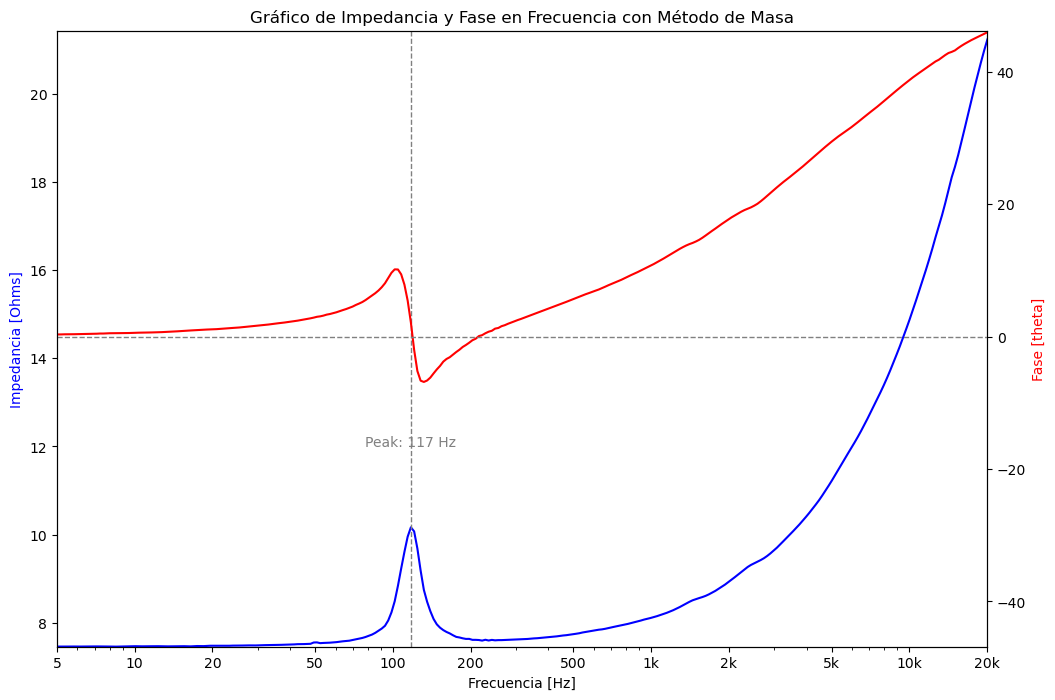

In [8]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Graficar la impedancia en el primer eje (ax1)
ax1.plot(Mass['Freq'], Mass['Impedance'], 'b-')
ax1.set_xlabel('Frecuencia [Hz]')
ax1.set_ylabel('Impedancia [Ohms]', color='b')

# Configurar el eje Y para que se ajuste a los valores de la impedancia
ax1.set_ylim(Mass['Impedance'].min(), Mass['Impedance'].max())

# Crear un segundo eje Y (ax2) para la fase
ax2 = ax1.twinx()
ax2.plot(Mass['Freq'], Mass['Phase'], 'r-')
ax2.set_ylabel('Fase [theta]', color='r')

# Configurar el eje X en escala logarítmica
plt.xlim(5,20000)
plt.xscale('log')
plt.xticks(XTICKS,XTICK_LABELS)

# Desplazar verticalmente la gráfica de fase para que no se superponga con la impedancia
# Puedes ajustar los límites en ax2 para separarlo visualmente.
ax2.set_ylim(Mass['Phase'].min() - 40, Mass['Phase'].max() - 0)

# Agregar una línea punteada en el eje 0 de la fase
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)

# Graficar la línea vertical en la frecuencia del valor máximo de la impedancia
ax1.axvline(117, color='gray', linestyle='--', linewidth=1)

ax1.text(117,12, f'Peak: 117 Hz', 
         color='gray', fontsize=10, ha='center')

plt.title('Gráfico de Impedancia y Fase en Frecuencia con Método de Masa')

plt.show();

## Pregunta 2: Parámetros

In [9]:
fs=246.2
ws=2*np.pi*fs
fs_m=118.3
ws_m=2*np.pi*fs_m

In [10]:
#Datos
Zmax=12.53 #ohms
M=4.64/1000 #kg
rho=1.18
c=344 #m/s
ro=1.68 
f1=213.3
f2=283

In [11]:
#Parámetros calculados
RE=7.45 #ohms
LE=0.000122 #H
CMS=0.0003 #m/N 
VAS=0.0008489 #m^3 
MMS=0.001393 #kg 
QMS=4.57
QES=6.72
QTS=2.72
RMS=0.47 #ohms
BL=1.55

## Pregunta 3: Impedancia eléctrica

In [12]:
Rango_freq = np.arange(5,20001,1)

In [13]:
def Ze (Rango_freq, ws, RE, LE, CMS, QMS, BL):
    imp = []
    for f in Rango_freq:
        w=f*2*np.pi
        Ze=RE+(1j*w*LE)+(BL**2/RMS)*((1j*w/(ws*QMS))/(1-(w/ws)**2+(1j*w/(ws*QMS))))
        imp.append(Ze)
    return imp

In [14]:
ZE= Ze(Rango_freq, ws, RE, LE, CMS, QMS, BL)

In [15]:
def Zabs (ZE):
    absolute = []
    for Z in ZE:
        Zabs=np.abs(Z)
        absolute.append(Zabs)
    return absolute

In [16]:
ZABS= Zabs(ZE)

In [17]:
def calcPhase (ZE):
    phase=[]
    for Z in ZE:
        calc=(np.arctan(np.imag(Z)/np.real(Z)))*(180/np.pi)
        phase.append(calc)
    return phase

In [18]:
Phase= calcPhase(ZE)

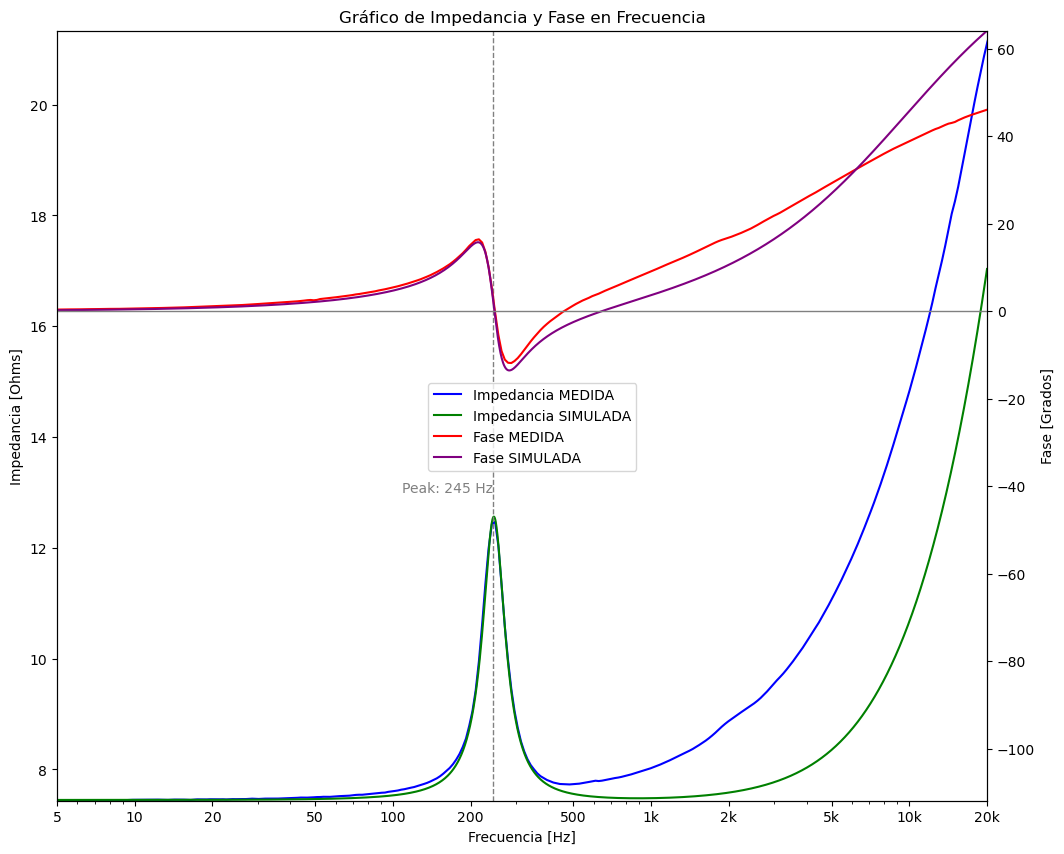

In [19]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 10))

# Graficar la impedancia en el primer eje (ax1)
ax1.plot(Free_air['Freq'], Free_air['Impedance'], 'b-', label= 'Impedancia MEDIDA')
ax1.set_xlabel('Frecuencia [Hz]')
ax1.set_ylabel('Impedancia [Ohms]', color='k')

# Configurar el eje Y para que se ajuste a los valores de la impedancia
ax1.set_ylim(Free_air['Impedance'].min(), Free_air['Impedance'].max())

# Crear un segundo eje Y (ax2) para la fase
ax2 = ax1.twinx()
ax2.plot(Free_air['Freq'], Free_air['Phase'], 'r-', label= 'Fase MEDIDA')
ax2.set_ylabel('Fase [Grados]', color='k')

# Crear un tercer eje X (ax3) para la impedancia SIMULADA
ax1.plot(Rango_freq, ZABS, 'green', label= 'Impedancia SIMULADA')

# Crear un cuarto eje Y (ax4) para la fase SIMULADA
ax2.plot(Rango_freq,Phase, 'purple', label= 'Fase SIMULADA')

# Configurar el eje X en escala logarítmica
plt.xlim(5,20000)
plt.xscale('log')
plt.xticks(XTICKS,XTICK_LABELS)

# Desplazar verticalmente la gráfica de fase para que no se superponga con la impedancia
# Puedes ajustar los límites en ax2 para separarlo visualmente.

ax2.set_ylim(Free_air['Phase'].min() - 100, max(Phase) - 0)

# Agregar una línea punteada en el eje 0 de la fase
ax2.axhline(0, color='gray', linestyle='-', linewidth=1)

# Graficar la línea vertical en la frecuencia del valor máximo de la impedancia
ax1.axvline(245, color='gray', linestyle='--', linewidth=1)

ax1.text(245,13, f'Peak: 245 Hz', 
         color='gray', fontsize=10, ha='right')

fig.legend(loc= 'center',fontsize=10)

plt.title('Gráfico de Impedancia y Fase en Frecuencia')



plt.show();

## Pregunta 4: Modelo de altavoz de radiación directa
Reproducir las figuras 6.7 (nivel de presión sonora en el eje) y 6.8 (impedancia eléctrica) del capítulo 6 del libro. Luego, utilizando el modelo implementado, calcular y graficar el nivel de presión sonora (a 1m) sobre el eje del parlante medido, junto con discutir las tendencias observadas.

In [20]:
#Datos para ZMT
Rg=0 #ohms
MMD=MMS-2*2.67*a**3*rho #kg

In [21]:
imp = []
for f in Rango_freq:
    w=f*2*np.pi
    ka=(w/c)*a
    j_1=j1(2*ka)
    H_1=struve(1,2*ka)
    ZMT=(BL**2/(Rg+RE+1j*w*LE))+1j*w*MMD*+RMS+(1/(1j*w*CMS))+2*sd*rho*c*(1-(j_1/ka)+1j*(H_1/ka)) #ohms
    imp.append(ZMT)
ZMT=imp

In [22]:
#Datos para uc(rms)
eg=2.83 #v
eg_rms=np.abs(eg/np.sqrt(2)) #v

#Velocidad rms

uc_rms=[]
for i,f in enumerate(Rango_freq):
    w=f*2*np.pi
    valor=np.abs(eg_rms*BL/((Rg+RE+1j*w*LE)*ZMT[i])) #m/s
    uc_rms.append(valor)

In [23]:
#Presión rms a un metro
r=1 #m

P_rms=[]
for i,j in enumerate(uc_rms):
    p=rho*Rango_freq[i]*sd*j/r
    P_rms.append(p)

#SPL
Pref=20 #uPa

SPL=[]
for i in P_rms:
    leq=20*np.log(i/Pref) #dB
    SPL.append(leq)

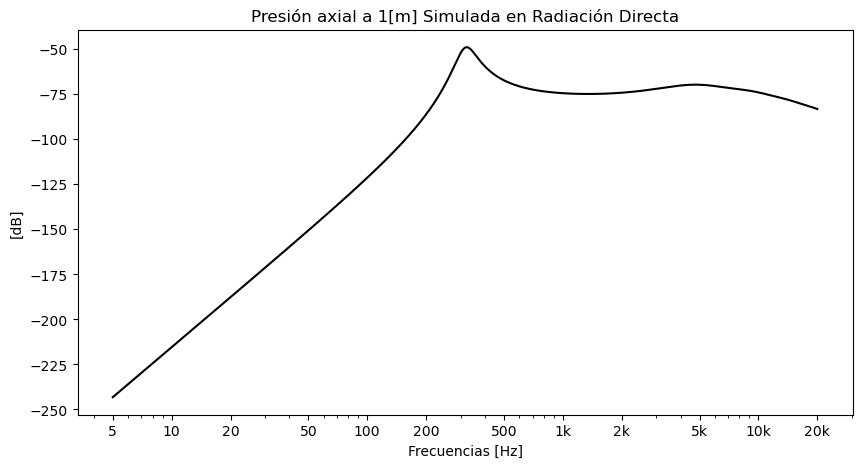

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(Rango_freq, SPL, 'k', label= 'SPL')
ax1.set_xlabel('Frecuencias [Hz]')
ax1.set_ylabel('[dB]')

plt.xscale('log')
plt.xticks(XTICKS,XTICK_LABELS)

plt.title('Presión axial a 1[m] Simulada en Radiación Directa')
#plt.savefig('presionaxial_raddirect.png', dpi=300, bbox_inches='tight')

plt.show();

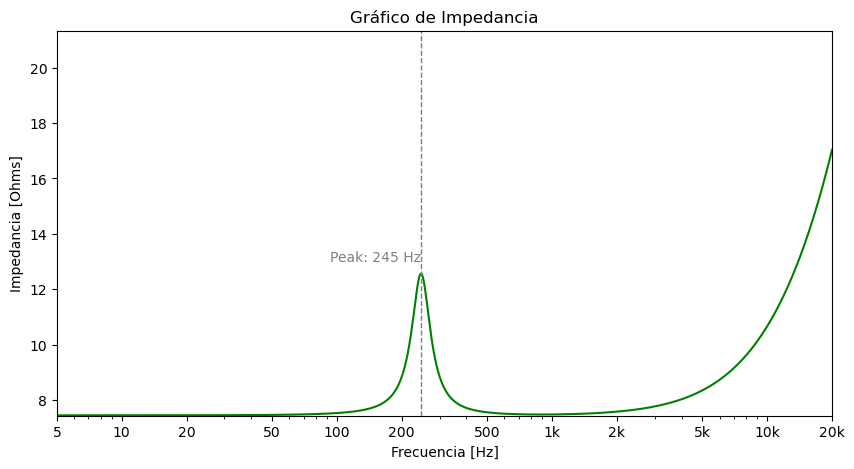

In [85]:
#Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Graficar la impedancia en el primer eje (ax1)
ax1.set_xlabel('Frecuencia [Hz]')
ax1.set_ylabel('Impedancia [Ohms]', color='k')

# Configurar el eje Y para que se ajuste a los valores de la impedancia
ax1.set_ylim(Free_air['Impedance'].min(), Free_air['Impedance'].max())

# Crear un tercer eje X (ax3) para la impedancia SIMULADA
ax1.plot(Rango_freq, ZABS, 'green', label= 'Impedancia SIMULADA')

# Configurar el eje X en escala logarítmica
plt.xlim(5,20000)
plt.xscale('log')
plt.xticks(XTICKS,XTICK_LABELS)


# Graficar la línea vertical en la frecuencia del valor máximo de la impedancia
ax1.axvline(245, color='gray', linestyle='--', linewidth=1)

ax1.text(245,13, f'Peak: 245 Hz', 
         color='gray', fontsize=10, ha='right')


plt.title('Gráfico de Impedancia')

plt.savefig('impedancia rad direct.png', dpi=300, bbox_inches='tight')

plt.show();

## Pregunta 5:
### 5.1 Diseñar una caja acústica cerrada
Utilizando el parlante medido y el modelo implementado en la pregunta 4, diseñar una caja acústica cerrada cuyo rango de frecuencia de trabajo comience al menos en los 300 Hz.
    Incluir y discutir gráﬁcas de la impedancia eléctrica y nivel de presión sonora emitido por la caja acústica diseñada y un esquema de la caja diseñada que muestre todas las dimensiones.
    Además, presentar todos los parámetros del diseño en una tabla.

In [25]:
#Impedancia de la Bobina
def Ze_bobina (Rango_freq, RE, LE):
    imp = []
    for f in Rango_freq:
        w=f*2*np.pi
        bob = RE + 1J*w*LE
        imp.append(bob)
    return imp

In [26]:
Ze_bob = Ze_bobina(Rango_freq, RE, LE)

In [27]:
#Impedancia del Diafragma
def func_ZMD (Rango_freq, RMS, MMD, CMS):
    imp = []
    for f in Rango_freq:
        w=f*2*np.pi
        zmd = RMS + 1j*w*MMD + (1/(1j*w*CMS))
        imp.append(zmd)
    return imp

In [28]:
ZMD = func_ZMD (Rango_freq, RMS, MMD, CMS)

In [29]:
#Impedancia de radiación
def func_Zr(Rango_freq, rho, c, a):
    array = []
    for f in Rango_freq:
        Z0= rho * c
        w=f*2*np.pi
        ka=(w/c)*a
        j_1=j1(2*ka)
        H_1=struve(1,2*ka)
        Rs = Z0 * ( 1 - (j_1 / ka))
        Xs = Z0 * (H_1 / ka)
        Zr= Rs + 1j * Xs
        array.append(Zr)
    return imp

In [30]:
Zr = func_Zr(Rango_freq, rho, c, a)

In [31]:
# Impedancia de la Caja
def func_ZAB(Rango_freq, lx, ly, lz, d, rho, c):
    array = []
    for f in Rango_freq:
        Z0= rho * c
        w=f*2*np.pi
        k=w/c
        zab = -1j * (Z0/(lx*ly)) * (1 / np.tan( k*( lz + d )))
        array.append(zab)
    return array

In [32]:
QTC = 2.94
VB = VAS / (((QTC /QTS)**2)-1)
VB

0.005043769482814013

No se pueden utilizar los alineamientos

In [33]:
lx = 0.15  #m
ly = 0.15  #m
lz = 0.22 #m
d = 0.01 #m

V_B = lx*ly*(lz+d)
print(V_B)

ZAB = func_ZAB(Rango_freq, lx, ly, lz, d, rho, c)

0.005175


In [34]:
# Impedancia eléctrica de la caja
def func_Ze_caja(Rango_freq, RE, LE, BL, RMS, MMD, CMS, sd, ZAB, Zr):
    array = []
    for i,f in enumerate(Rango_freq):
        w=f*2*np.pi
        Ze = RE + 1j*w*LE + ( (BL**2) / (RMS + 1J*w*MMD + (1/1j*w*CMS) + (sd**2)*(ZAB[i] + Zr[i])))
        array.append(Ze)
    return array

In [35]:
Ze_caja = func_Ze_caja(Rango_freq, RE, LE, BL, RMS, MMD, CMS, sd, ZAB, Zr)

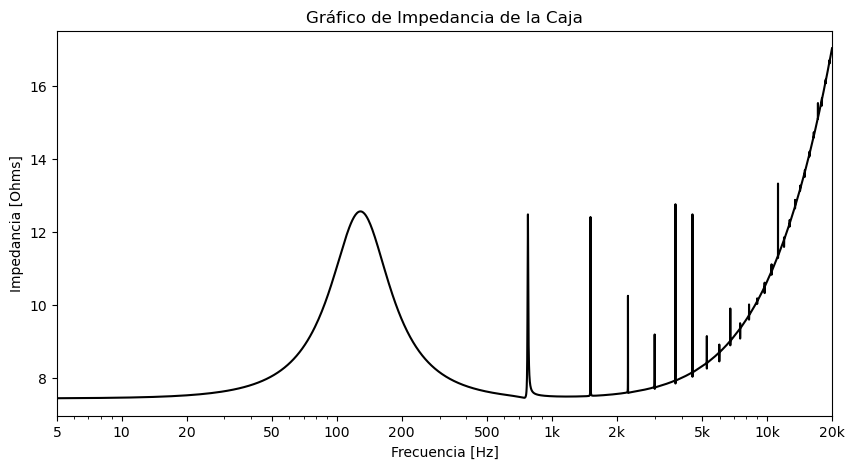

In [66]:
#Gráfico ZE caja
#Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Graficar la impedancia en el primer eje (ax1)
ax1.set_xlabel('Frecuencia [Hz]')
ax1.set_ylabel('Impedancia [Ohms]', color='k')

# Crear un tercer eje X (ax3) para la impedancia SIMULADA
ax1.plot(Rango_freq, np.abs(Ze_caja), 'k', label= 'Ze caja')

# Configurar el eje X en escala logarítmica
plt.xlim(5,20000)
plt.xscale('log')
plt.xticks(XTICKS,XTICK_LABELS)


plt.title('Gráfico de Impedancia de la Caja')

#plt.savefig('impedancia caja.png', dpi=300, bbox_inches='tight')

plt.show();

In [37]:
# Presión en el eje a 1 metro con Caja
def func_P_caja(Rango_freq, rho, c, a, LE, BL, Ze_bob, eg, CMS, sd, ZAB, Zr):
    array = []
    for i,f in enumerate(Rango_freq):
        w  = f * 2 * np.pi
        k = w/c 
        P = (-1j*(rho*sd*eg/BL)*(np.exp(-1j*k*a)/4*np.pi*a)*( w / (1 + ( Ze_bob[i] / (BL**2))*(ZMD[i]+(sd**2)*(ZAB[i]+Zr[i])))))
        array.append(P)
    return array

In [38]:
P_caja=func_P_caja(Rango_freq, rho, c, a, LE, BL, Ze_bob, eg, CMS, sd, ZAB, Zr)

In [39]:
#SPL
Pref=20 #uPa

SPL_caja=[]
for i in P_caja:
    leq=20*np.log(abs(i)/Pref) #dB
    SPL_caja.append(leq)

''

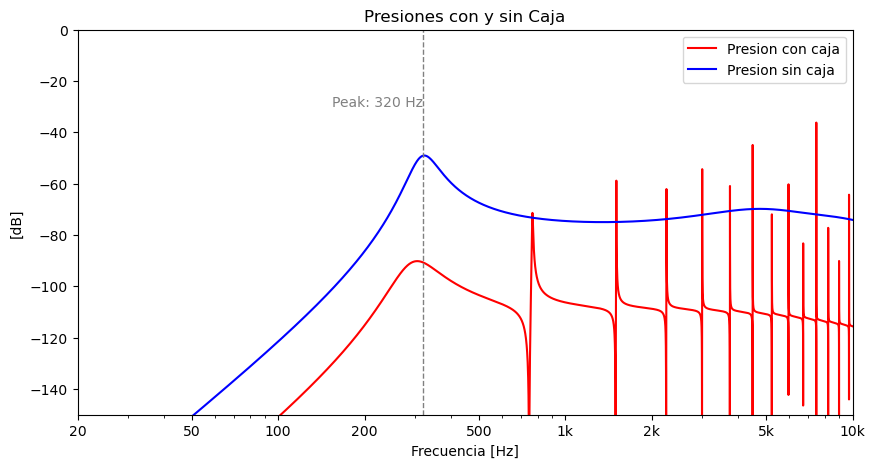

In [84]:
#Gráfico Presión caja
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(Rango_freq, SPL_caja , 'r', label= 'Presion con caja')
ax1.plot(Rango_freq, SPL, 'b', label= 'Presion sin caja' )

ax1.set_ylabel('[dB]')
ax1.set_xlabel('Frecuencia [Hz]')

ax1.set_ylim(-150, -0)
ax1.set_xlim(50,10000)
ax1.axvline(320, color='gray', linestyle='--', linewidth=1)
ax1.text(320,-30, f'Peak: 320 Hz', 
         color='gray', fontsize=10, ha='right')
plt.xscale('log')
plt.legend()

plt.xticks(XTICKS,XTICK_LABELS)
ax1.set_xlim(20,10000)

plt.title('Presiones con y sin Caja')

plt.savefig('presiones con y sin caja.png', dpi=300, bbox_inches='tight')
;



## Pregunta 5:
### 5.2 Evaluar y discutir influencia de material poroso en la caja
Evaluar y discutir cual es la inﬂuencia de revestir la caja acústica diseñada con un material poroso dado sobre su impedancia eléctrica y nivel de presión sonora emitido.
    Modelar el material poroso utilizando el modelo JCAL, considerando los parámetros que se muestran en la siguente tabla.

In [41]:
null = 0.994
theta_o = 27 * 10**-10 #m2
Ko = 1.68 * 10**-9 #m2
alpha_inf = 1.04 #inc
lambda_v = 92*10**-6 #m
lambda_t = 197 * 10** -6 #m

Po = 1 #101327.38 #N/m2
Cp = 1.012
kappa = 0.02 #w/mK
gamma = 1.4

In [42]:
Wt = ( null * kappa) / (rho * Cp * theta_o)
Mt = (8 * theta_o)/(null*(lambda_t**2))

In [43]:
def func_Theta_w(Wt, Mt, Rango_freq, theta_o):
    array = []
    for i,f in enumerate(Rango_freq):
        w  = f * 2 * np.pi
        theta = theta_o *( ((1j*w/Wt) + np.sqrt(1+(1j*w*Mt/Wt*2)) )**-1 )
        array.append(theta)
    return array

In [44]:
Theta_w = func_Theta_w(Wt, Mt, Rango_freq, theta_o)

In [45]:
Wv = null * gamma / rho * alpha_inf * Ko
Mv= 8 * Ko * alpha_inf / null * (lambda_v**2)

In [46]:
def func_C_w(Po, null, rho, Cp, gamma, Theta_w, kappa, Rango_freq):
    array = []
    for i,f in enumerate(Rango_freq):
        w  = f * 2 * np.pi
        Cw = (null/Po) * (1 - 1j*w*rho*Cp*((gamma-1)/gamma)*(Theta_w[i]/(kappa*null)))
        array.append(Cw)
    return array

In [47]:
C_w= func_C_w(Po, null, rho, Cp, gamma, Theta_w, kappa, Rango_freq)

In [48]:
def func_K_w(Wv, Mv, Rango_freq, Ko):
    array = []
    for i,f in enumerate(Rango_freq):
        w  = f * 2 * np.pi
        K = Ko *( (1j*w/Wv) + np.sqrt(1+(1j*w*Mv/Wv*2)) )**-1
        array.append(K)
    return array

In [49]:
K_w = func_K_w(Wv, Mv, Rango_freq, Ko)

In [50]:
#Caja revestida - Método JCAL

Eta = 0.00084

In [51]:
def func_Zc(Eta, Rango_freq, K_w, C_w):
    array = []
    for i,f in enumerate(Rango_freq):
        w  = f * 2 * np.pi
        Zc = np.sqrt(Eta / (1j*w*K_w[i]*C_w[i]))
        array.append(Zc)
    return array

In [52]:
Z_c = func_Zc(Eta, Rango_freq, K_w, C_w)

In [53]:
def func_K_c(Eta, Rango_freq, C_w, K_w):
    array = []
    for i,f in enumerate(Rango_freq):
        w  = f * 2 * np.pi
        Kc = w * np.sqrt(Eta*C_w[i] / (1j*w*K_w[i]))
        array.append(Kc)
    return array

In [54]:
K_c= func_K_c(Eta, Rango_freq, C_w, K_w)

In [55]:
def func_Z_w(Z_c, K_c, d):
    array = []
    for i,j in enumerate(Z_c):
        
        angle = K_c[i] * d
        tangent_value = np.tan(angle)
            
        Zw = -1j * Z_c[i] * (1 / tangent_value)
        array.append(Zw)
    return array

In [56]:
Z_w= func_Z_w(Z_c, K_c, d)

C:\Users\segori\AppData\Local\Temp\ipykernel_34372\1902717561.py:6: RuntimeWarning: overflow encountered in tan
  tangent_value = np.tan(angle)


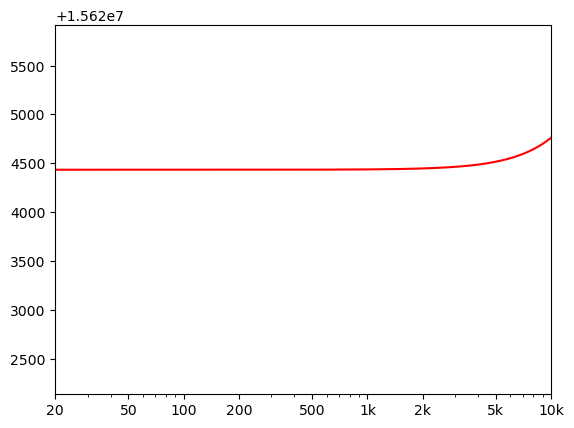

In [58]:
#Gráfico Presión caja
fig, ax1 = plt.subplots()
ax1.plot(Rango_freq, np.abs(Z_w) , 'r')
plt.xscale('log')
plt.xticks(XTICKS,XTICK_LABELS)
ax1.set_xlim(20,10000);